### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [4]:
# Write your code here 
import numpy as np

data_a = np.random.normal(20,4,15)
data_b = np.random.normal(20,4,15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [5]:
# Write your code here 

np.mean(data_a), np.mean(data_b)

(20.770949940368144, 19.686287589403022)

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

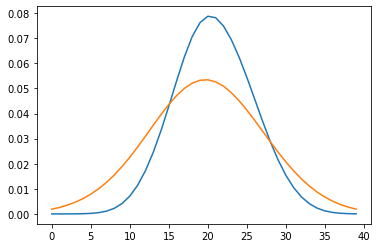

In [20]:
# Write your code here 
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.arange(0,40,1)
kde1 = sp.stats.gaussian_kde(data_a, bw_method = 0.8)
kde2 = sp.stats.gaussian_kde(data_b, bw_method = 1.2)
plt.plot(x, kde1.evaluate(x))
plt.plot(x, kde2.evaluate(x))

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

In [ ]:
# Write your code here 

Yes, A is visually significantly different from B

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [24]:
# Write your code here 

data = np.concatenate([data_a,data_b])
pval = []

for _ in range (1000):
    np.random.shuffle(data)
    a=data[:20]
    b=data[20:]
    pval.append(np.mean(a)-np.mean(b))

sum(pval >= np.mean(data_a) - np.mean(data_b)) /1000

# Given that p value is .295, it is significantly different

0.295

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

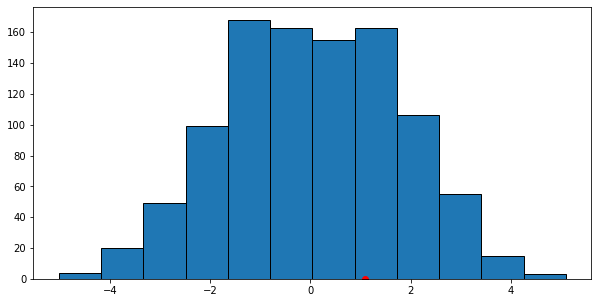

In [40]:
# Write your code here 
plt.figure(figsize=(10,5))
plt.hist(pval, edgecolor='black', bins=12)
plt.scatter(np.mean(data_a)- np.mean(data_b), 0, color='red')